In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer

In [2]:
# Gantilah path sesuai dengan lokasi file yang Anda upload di Google Colab
data = pd.read_csv('/content/diabetes_dataset.csv')

Dataset ini menyediakan informasi mengenai jumlah baris dan kolom, tipe data dari setiap fitur, statistik deskriptif, serta jumlah nilai yang hilang untuk setiap kolom.

In [3]:
# Informasi awal tentang dataset
print(data.info())
print(data.describe())

# Cek nilai kosong
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

Visualisasi Distribusi Fitur: Menampilkan histogram untuk mengamati distribusi dari masing-masing fitur.

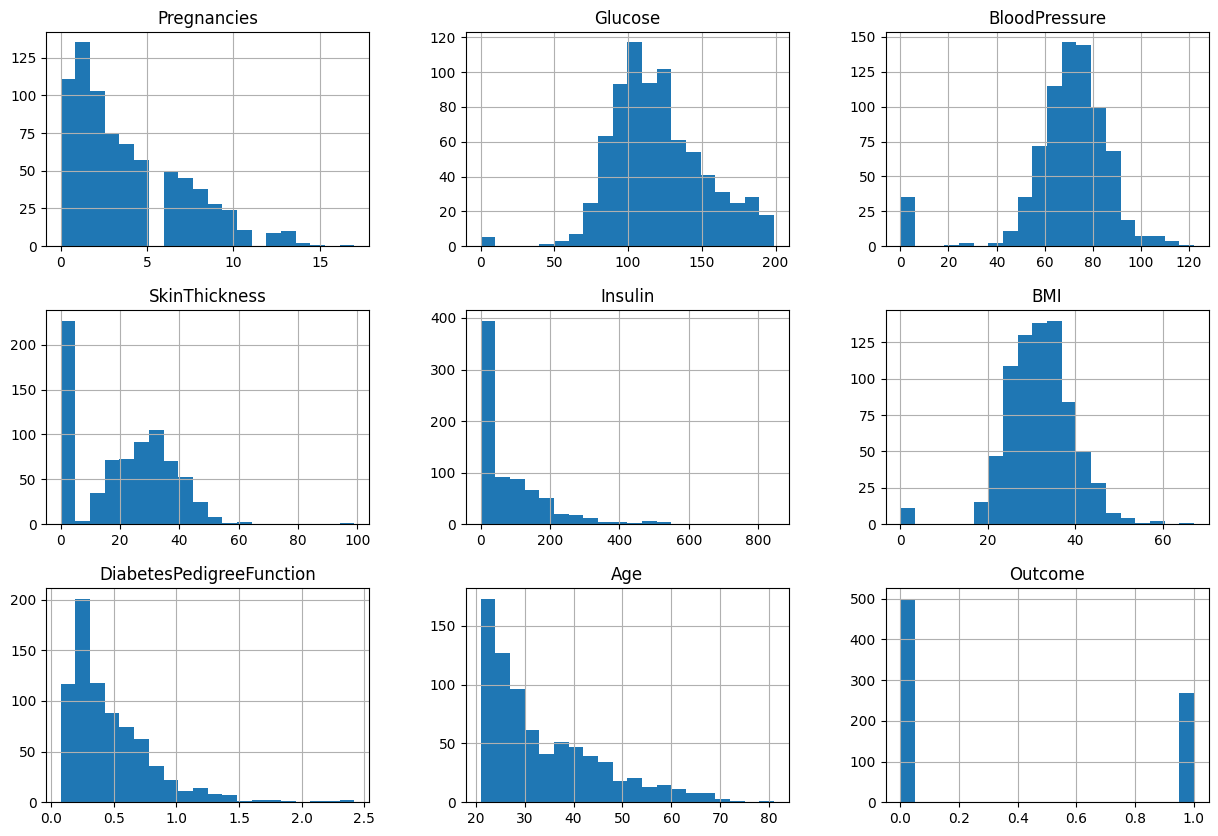

In [4]:
# Visualisasi distribusi setiap fitur
data.hist(bins=20, figsize=(15, 10))
plt.show()

Visualisasi Hubungan Antar Variabel: Korelasi antar fitur numerik divisualisasikan melalui heatmap untuk memahami pola keterkaitan.

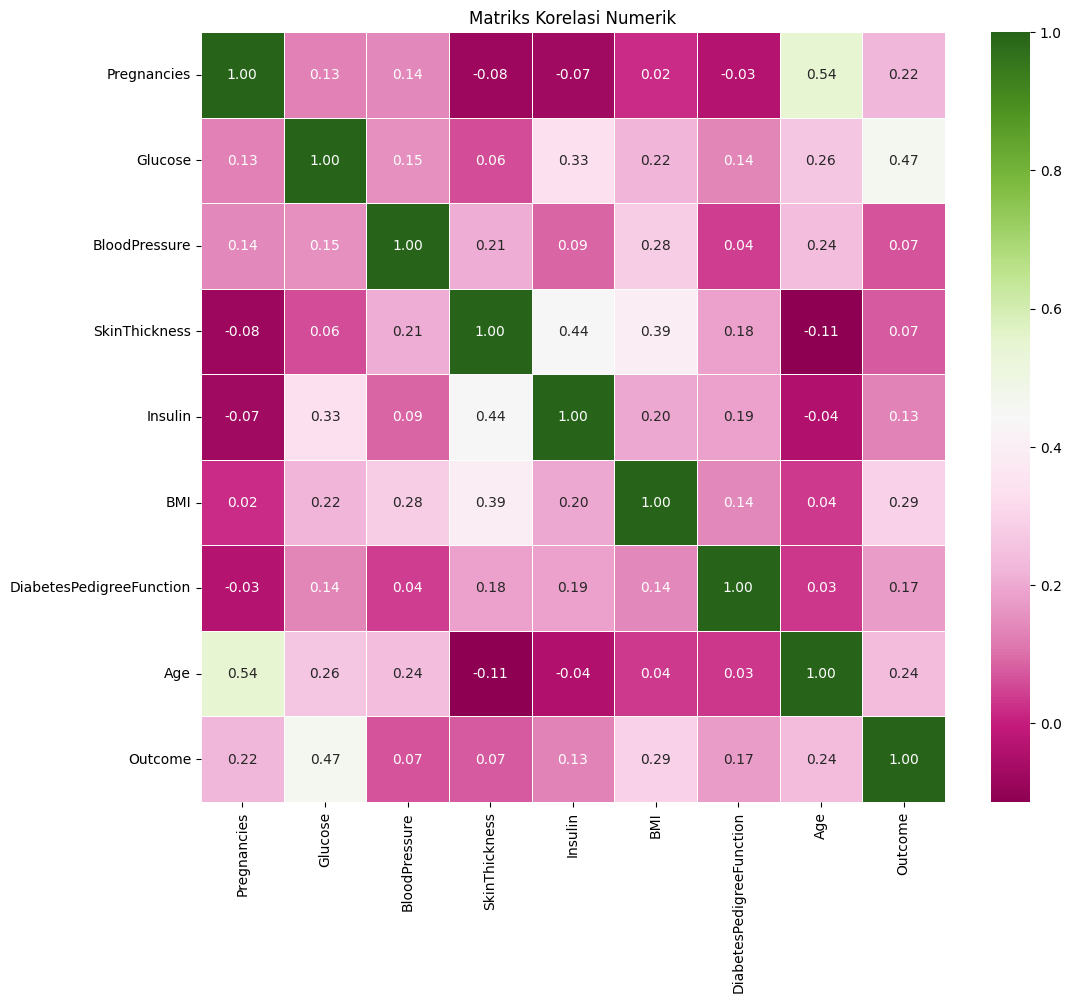

In [5]:
# Memastikan bahwa 'data_numeric' hanya berisi kolom numerik
data_numeric = data.select_dtypes(include=['float64', 'int64'])

# Visualisasi Korelasi Antar Variabel untuk seluruh dataset numerik
plt.figure(figsize=(12, 10))
sns.heatmap(data_numeric.corr(), annot=True, cmap='PiYG', fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi Numerik")
plt.show()


Menghapus kolom selain numerik untuk menyederhanakan analisis korelasi."

In [6]:
# Menghapus kolom non-numerik untuk visualisasi korelasi
data_numeric = data.select_dtypes(include=[np.number])

Preprocessing Data (Encoding, Imputasi, dan Split)

* Fitur MSRP dipisahkan sebagai target (y).
* Fitur kategorikal dikonversi ke bentuk numerik dengan One-Hot Encoding.
* Nilai kosong diimputasi dengan rata-rata.
* Dataset dibagi menjadi data latih dan data uji.

In [9]:
import pandas as pd

# Membaca dataset
file_path = '/content/diabetes_dataset.csv'
data = pd.read_csv(file_path)  # Memuat dataset

# Menampilkan nama-nama kolom dalam dataset
print(data.columns)  # Mengecek nama kolom untuk memastikan kolom target

# Memisahkan fitur (X) dan target (y)
X = data.drop('Outcome', axis=1)  # Menghapus kolom target dari fitur
y = data['Outcome']  # Mengambil kolom target sebagai variabel target

# Konversi kolom kategorikal menjadi bentuk numerik dengan One-Hot Encoding (jika ada kolom kategorikal)
X = pd.get_dummies(X, drop_first=True)  # Jika ada kolom kategorikal, ubah menjadi numerik


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


Membangun Model Regresi Linear

* Model regresi linear dilatih dengan data latih.
* Hasil prediksi dievaluasi menggunakan RMSE, MSE, dan R-squared.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Membaca dataset
file_path = '/content/diabetes_dataset.csv'
data = pd.read_csv(file_path)

# Memisahkan fitur (X) dan target (y)
X = data.drop('Outcome', axis=1)  # Menghapus kolom target dari fitur
y = data['Outcome']  # Mengambil kolom target sebagai variabel target

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 20% data untuk pengujian

# Membuat dan melatih model regresi linear
lin_reg = LinearRegression()  # Inisialisasi model Linear Regression
lin_reg.fit(X_train, y_train)  # Melatih model menggunakan data latih

# Memprediksi pada data uji
y_pred = lin_reg.predict(X_test)  # Melakukan prediksi pada data uji

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)  # Menghitung Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)  # Menghitung Mean Absolute Error
r2 = r2_score(y_test, y_pred)  # Menghitung R² Score

# Menampilkan hasil evaluasi
print("Linear Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")


Linear Regression Model Evaluation:
Mean Squared Error (MSE): 0.17104527280850104
Mean Absolute Error (MAE): 0.34812825999928243
R² Score: 0.25500281176741757


Menyajikan 10 fitur dengan koefisien terbesar dan terkecil untuk melihat pengaruhnya.

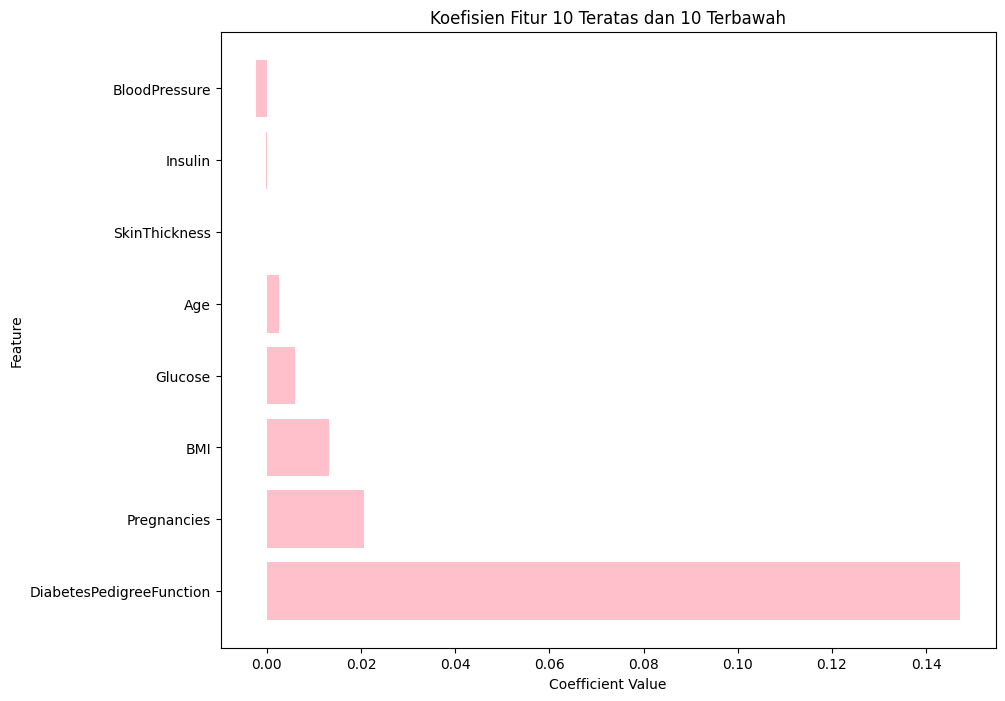

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Misalkan 'X' adalah fitur dan 'y' adalah target
model = LinearRegression()
model.fit(X, y)

# Mendapatkan koefisien dan fitur
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

# Menampilkan hanya 10 fitur dengan koefisien terbesar dan 10 fitur dengan koefisien terkecil
top_n = 10
top_coefficients = pd.concat([coefficients.head(top_n), coefficients.tail(top_n)])

# Visualisasi koefisien
plt.figure(figsize=(10, 8))
plt.barh(top_coefficients['Feature'], top_coefficients['Coefficient'], color='pink')
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Koefisien Fitur 10 Teratas dan 10 Terbawah")
plt.show()


Pembuatan Model Polinomial dengan Fitur Terpenting

* memilih fitur dengan korelasi tinggi terhadap target.
* Menggunakan fitur tersebut untuk membuat model dengan basis polinomial (derajat 2).
* Model dilatih dan dievaluasi dengan data polinomial.

In [15]:
import pandas as pd

# Membaca dataset
file_path = '/content/diabetes_dataset.csv'
data = pd.read_csv(file_path)  # Membaca dataset

# Memeriksa nama-nama kolom dalam dataset
print(data.columns)  # Menampilkan semua kolom untuk memastikan nama kolom target yang benar

# Menggunakan nama kolom yang benar
X = data.drop('Outcome', axis=1)  # Menghapus kolom target (Outcome) dari fitur
y = data['Outcome']  # Menggunakan kolom target (Outcome)


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


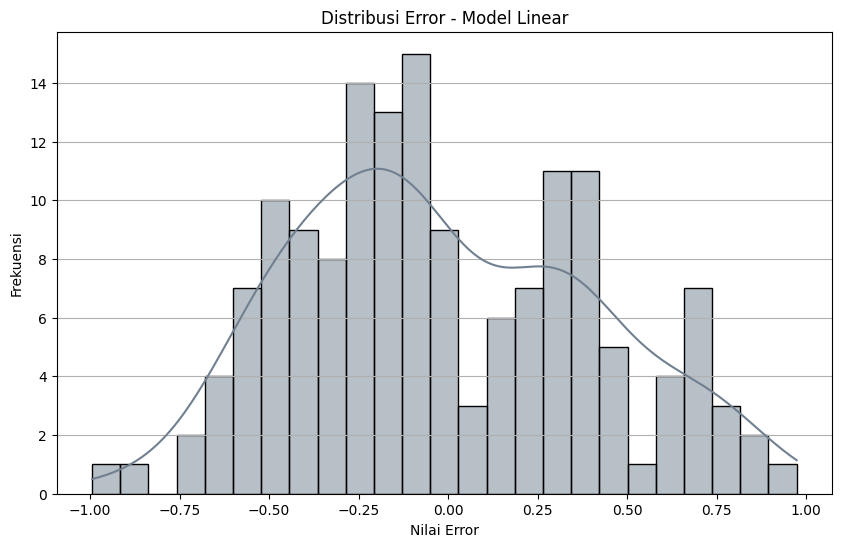

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Membaca dataset
file_path = '/content/diabetes_dataset.csv'
data = pd.read_csv(file_path)

# Memisahkan fitur (X) dan target (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat dan melatih model Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred_lin = lin_reg.predict(X_test)

# Visualisasi Distribusi Error
plt.figure(figsize=(10, 6))
sns.histplot((y_test - y_pred_lin), kde=True, color="slategray", bins=25, edgecolor="black")  # Membuat histogram error
plt.title("Distribusi Error - Model Linear")
plt.xlabel("Nilai Error")
plt.ylabel("Frekuensi")
plt.grid(axis='y')
plt.show()


Visualisasi perbandingan antara prediksi dan nilai sebenarnya dengan menampilkan scatter plot

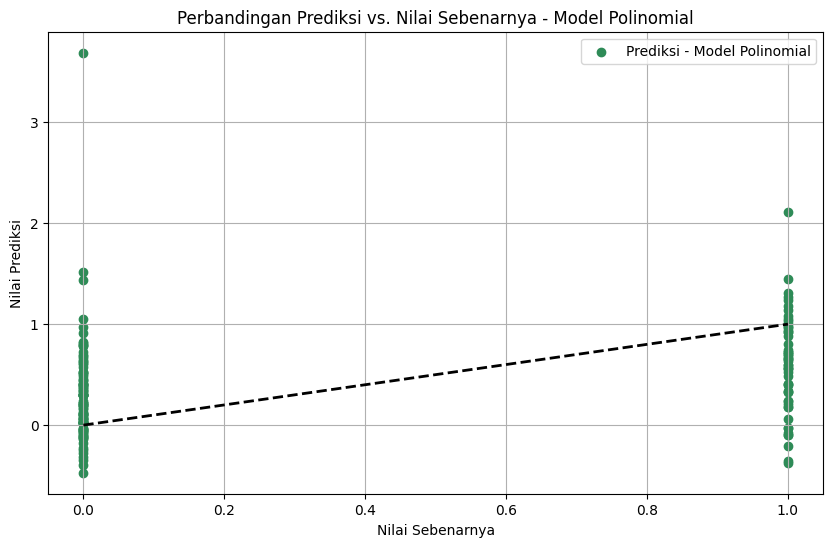

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Membaca dataset
file_path = '/content/diabetes_dataset.csv'
data = pd.read_csv(file_path)

# Memisahkan fitur (X) dan target (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat pipeline untuk Polynomial Regression
poly_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),  # Membuat fitur polinomial dengan derajat 3
    ('linear_model', LinearRegression())  # Model Linear Regression
])

# Melatih model Polynomial Regression
poly_pipeline.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred_poly = poly_pipeline.predict(X_test)

# Visualisasi Perbandingan Prediksi vs. Nilai Sebenarnya
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poly, color='seagreen', label="Prediksi - Model Polinomial")  # Plot prediksi vs nilai sebenarnya
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', linewidth=2)  # Garis referensi
plt.xlabel("Nilai Sebenarnya")  # Label sumbu X
plt.ylabel("Nilai Prediksi")  # Label sumbu Y
plt.title("Perbandingan Prediksi vs. Nilai Sebenarnya - Model Polinomial")  # Judul plot
plt.legend()  # Menambahkan legenda
plt.grid()  # Menambahkan grid
plt.show()


Membuat tabel perbandingan metrik kinerja antara model linear dan model polinomial dengan tujuan membandingkan kinerja model

In [23]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Membuat model Linear Regression dan Polynomial Regression (kode ini diasumsikan sudah ada sebelumnya)
# Linear Regression
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# Polynomial Regression
poly_pipeline.fit(X_train, y_train)
y_pred_poly = poly_pipeline.predict(X_test)

# Menghitung metrik evaluasi untuk Linear Regression
mse_lin = mean_squared_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mse_lin)  # Root Mean Squared Error
r2_lin = r2_score(y_test, y_pred_lin)

# Menghitung metrik evaluasi untuk Polynomial Regression
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)  # Root Mean Squared Error
r2_poly = r2_score(y_test, y_pred_poly)

# Membuat DataFrame untuk membandingkan hasil model
model_comparison = pd.DataFrame({
    'Jenis Model': ['Linear Regression', 'Polynomial Basis Regression'],
    'Root Mean Square Error (RMSE)': [rmse_lin, rmse_poly],
    'Mean Square Error (MSE)': [mse_lin, mse_poly],
    'Koefisien Determinasi (R²)': [r2_lin, r2_poly]
})

# Menampilkan hasil perbandingan model
print(model_comparison)



                   Jenis Model  Root Mean Square Error (RMSE)  \
0            Linear Regression                       0.413576   
1  Polynomial Basis Regression                       0.596720   

   Mean Square Error (MSE)  Koefisien Determinasi (R²)  
0                 0.171045                    0.255003  
1                 0.356074                   -0.550902  


In [24]:
# Importing necessary libraries
import pandas as pd

# Creating a DataFrame to compare the performance of different models
model_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Basis Regression'],
    'RMSE': [rmse_lin, rmse_poly],
    'MSE': [mse_lin, mse_poly],
    'R² Score': [r2_lin, r2_poly]
})

# Displaying the comparison results
print("Model Performance Comparison:\n", model_comparison)

Model Performance Comparison:
                          Model      RMSE       MSE  R² Score
0            Linear Regression  0.413576  0.171045  0.255003
1  Polynomial Basis Regression  0.596720  0.356074 -0.550902
